## A06: Agent-Based Model: Thomas Schelling's Segregation Model

In 1971 Thomas Schelling published “Dynamic Models of Segregation,” which proposes a simple model of racial segregation. The Schelling model of the world is a grid; each cell represents a house. The houses are occupied by two kinds of “agents,” labeled red and blue, in roughly equal numbers. About 10% of the houses are empty.

At any point in time, an agent might be happy or unhappy, depending on the other agents in its immediate neighborhood. The neighborhood of each house is the set of eight adjacent cells. In one version of the model, agents are happy if they have at least two neighbors like themselves, and unhappy if they have one or zero.

The simulation proceeds by choosing an agent at random and checking to see whether it is happy. If so, then nothing happens; if not, the agent chooses one of the unoccupied cells at random and moves.

Schelling demonstrated his model with coins on a chess =board. We get the privilege to use a computer. 

The class below is one implementation of the basics of this simulation. (You are welcome to use this one, but you are also welcome to change it, or indeed make your own).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class City():

    def __init__(self, size, proportions, threshold):
        self.size = size        
        self.pop = np.random.choice([-1,0,1],p=proportions,size=(size,size))
        self.threshold = threshold
        
    def show(self):
        plt.imshow(self.pop, interpolation="nearest", cmap="bwr")
        plt.xticks([])
        plt.yticks([])
        plt.show()        
        
    def step(self):
        # pick random house
        i,j = self.randomHouse()
        # find a place to move to if it's unhappy
        if self.numberKin(i,j) < self.threshold:
            self.move(i,j)        
        
    def numberKin(self, i, j):
        return np.count_nonzero(self.pop[i-1:i+2,j-1:j+2]==self.pop[i,j])-1

    def move(self, i, j):
        newi,newj = self.randomVacant()
        self.pop[newi][newj] = self.pop[i][j]
        self.pop[i][j] = 0
        
    def randomHouse(self):
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] != 0:
                found = True
        return i, j

    def randomVacant(self):
        np.where(self.pop==0)
        found = False
        while not found:
            i = np.random.randint(1,self.size-1)
            j = np.random.randint(1,self.size-1)
            if self.pop[i][j] == 0:
                found = True
        return i, j
           

In [3]:
def run(threshold):
    c = City(50,[0.45,0.1,0.45],threshold)
    moves = 1000000
    c.show()
    for i in range(moves):
        c.step()
    c.show()

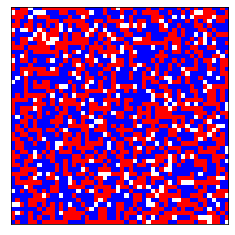

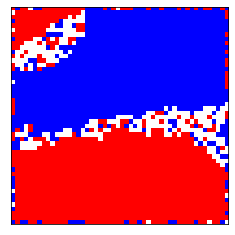

In [6]:
run(5)

1. (3 points) What happens when the agents become more/less tolerant? Show the final outcome for each different threshold of happiness. Interpret your results (as in, explain what you get for threshold = 0, 1, 2, ... 8 and why you think you see the results that you see). 

2. (3 points) Define a statistic that measures the degree of segregation. Add this as a method to the class. Call the method segindex(). Plot this statistic over time. Plot it for one threshold of your choice.

3. (3 points) Let's revisit the first question but now using this more succint measurement. How does the tolerance or threshold of happiness affect the final segregation index? To answer this question, plot the final segregation threshold as a function of threshold. Does your segregation index capture well the results that you observed from your experiment in question 1? If not, fix your segregation index so that it does. Interpret your results.

4. (3 points) Now that your segregation index works well, let's ask more questions about this model to understand it better. Let's discuss the role of vacant homes: How does vacancy affect the final segregation index of the city? To answer this question, pick a threshold and keep it fixed, and instead vary the proportion of vacancies systematically from 0 to 1. Make sure you make a hypothesis and even write it down, before you run your experiment. Did what you think would happen happened? Explain whether your prediction matched the results.

5. (8 points) Open ended. Select one way to extend/modify the model. Find a question to ask about the model (like the questions before this one). Answer your question with an experiment and visualize it with a figure. Interpret and discuss your results.